# Forestry simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import time

regions = ['Boreal', 'Temperate-dry', 'Temperate-humid', 'Tropical-dry', 'Tropical-humid']
tree_types = ['Broadleaf', 'Conifer', 'Eucalyptus', 'Oak', 'Pine', 'Teak']

# Removal rate in years 0-20, in t CO2 ha-1 year-1, from Table 1 on page 5 of:
# Bernal, Blanca & Murray, Lara & Pearson, Timothy. (2018). 
# Global carbon dioxide removal rates from forest landscape restoration activities. 
# Carbon Balance and Management. 13. 10.1186/s13021-018-0110-8. 
removal_rates = np.array([
    #Broadleaf, Conifer, Eucalyptus, Oak,   Pine,  Teak
    [8.0,       4.5,     0,          0,     10.2,  0   ], # boreal
    [11.8,      6.4,     37.9,       5.3,   7.6,   0   ], # temperate-dry
    [11.8,      11.6,    37.9,       9.5,   21.1,  0   ], # temperate-humid
    [10.7,      38.7,    38.8,       18.4,  21.0,  12.7], # tropical-dry
    [25.3,      23.6,    40.7,       0,     0,     30.8]  # tropical-humid
])

# Constants in Mha from Table 6, "Tree Cover Within Protected Areas in 2015, by Global Ecological Zone" on page 115 of:
# "FAO and UNEP. 2020. The State of the World’s Forests 2020. Forests, biodiversity and people. Rome."
tree_cover_tropical_rainforest          = 1068
tree_cover_tropical_moist_forest        = 472
tree_cover_tropical_dry_forest          = 218
tree_cover_tropical_mountain_system     = 179
tree_cover_subtropical_humid_forest     = 176
tree_cover_subtropical_dry_forest       = 37
tree_cover_subtropical_mountain_system  = 126
tree_cover_temperate_oceanic_forest     = 55
tree_cover_temperate_continental_forest = 271
tree_cover_temperate_mountain_system    = 257
tree_cover_boreal_coniferous_forest     = 659
tree_cover_boreal_tundra_woodland       = 229
tree_cover_boreal_mountain_system       = 444

# tree_cover_tropical_shrubland = 52    # NOT USED
# tree_cover_tropical_desert    = 5     # NOT USED
# tree_cover_subtropical_steppe = 35    # NOT USED
# tree_cover_subtropical_desert = 14    # NOT USED
# tree_cover_temperate_steppe   = 22    # NOT USED
# tree_cover_temperate_desert   = 15    # NOT USED
# tree_cover_polar              = 35    # NOT USED
# tree_cover_water              = 3     # NOT USED

# Estimate of planted teak from 4.35 to 6.89 Mha from:
# Kollert, Walter & Kleine, Michael. (2017). The Global Teak Study Analysis, 
# Evaluation and Future Potential of Teak Resources.
planted_teak_mha = (4.35+6.89)/2

# Constants in Mha from Table 7, "Area of planted forests by region and major species groups at 2005 and 
# 2030 for the three scenarios" on page 13 of:
# Carle, Jim & Holmgren, Peter. (2008). Wood from Planted Forests A Global Outlook 2005-2030. 
# Forest Products Journal. 58. 6-18.
planted_eucalyptus_mha = 13.8
planted_conifer_mha = 64
planted_pine_mha = 73.2
planted_hardwood_other_mha = 100.3+9.1
planted_hardwood_exc_teak_eucalyptus_mha = planted_hardwood_other_mha - planted_teak_mha
planted_total_mha = planted_eucalyptus_mha + planted_conifer_mha + planted_pine_mha + planted_hardwood_other_mha

In [9]:
tree_cover_total = \
    tree_cover_tropical_rainforest + \
    tree_cover_tropical_moist_forest + \
    tree_cover_tropical_dry_forest + \
    tree_cover_tropical_mountain_system + \
    tree_cover_subtropical_humid_forest + \
    tree_cover_subtropical_dry_forest + \
    tree_cover_subtropical_mountain_system + \
    tree_cover_temperate_oceanic_forest + \
    tree_cover_temperate_continental_forest + \
    tree_cover_temperate_mountain_system + \
    tree_cover_boreal_coniferous_forest + \
    tree_cover_boreal_tundra_woodland + \
    tree_cover_boreal_mountain_system

# Excluded from calculation of tree_cover_total:
#     tree_cover_tropical_shrubland
#     tree_cover_tropical_desert
#     tree_cover_subtropical_steppe
#     tree_cover_subtropical_desert
#     tree_cover_temperate_steppe
#     tree_cover_temperate_desert
#     tree_cover_polar
#     tree_cover_water

tree_cover_boreal          = tree_cover_boreal_coniferous_forest + tree_cover_boreal_tundra_woodland + tree_cover_boreal_mountain_system
tree_cover_temperate_dry   = tree_cover_subtropical_dry_forest + tree_cover_subtropical_mountain_system + tree_cover_temperate_mountain_system    
tree_cover_temperate_humid = tree_cover_subtropical_humid_forest + tree_cover_temperate_oceanic_forest + tree_cover_temperate_continental_forest
tree_cover_tropical_dry    = tree_cover_tropical_dry_forest + tree_cover_tropical_mountain_system
tree_cover_tropical_humid  = tree_cover_tropical_rainforest + tree_cover_tropical_moist_forest

boreal_perc     = tree_cover_boreal          / tree_cover_total
temp_dry_perc   = tree_cover_temperate_dry   / tree_cover_total
temp_humid_perc = tree_cover_temperate_humid / tree_cover_total
trop_dry_perc   = tree_cover_tropical_dry    / tree_cover_total
trop_humid_perc = tree_cover_tropical_humid  / tree_cover_total

show_data = [
    [tree_cover_boreal, tree_cover_temperate_dry, tree_cover_temperate_humid, tree_cover_tropical_dry, tree_cover_tropical_humid, tree_cover_total],
    [boreal_perc, temp_dry_perc, temp_humid_perc, trop_dry_perc, trop_humid_perc, boreal_perc + temp_dry_perc + temp_humid_perc + trop_dry_perc + trop_humid_perc]
]
pd.DataFrame(show_data, columns=['Boreal', 'Temperate-dry', 'Temperate-humid', 'Tropical-dry', 'Tropical-humid', 'Total']).round(3)

# Tree cover by Mha and proportion...

,Boreal,Temperate-dry,Temperate-humid,Tropical-dry,Tropical-humid,Total
0,1332.000,420.0,502.00,397.000,1540.000,4191.0
1,0.318,0.1,0.12,0.095,0.367,1.0


In [14]:
# Assumption: 25% of planted hardwood, excluding eucalyptus and teak, is oak.

planted_oak_mha       = planted_hardwood_exc_teak_eucalyptus_mha * 0.25
planted_broadleaf_mha = planted_hardwood_exc_teak_eucalyptus_mha * 0.75

planted_broadleaf_perc  = planted_broadleaf_mha  / planted_total_mha
planted_conifer_perc    = planted_conifer_mha    / planted_total_mha
planted_eucalyptus_perc = planted_eucalyptus_mha / planted_total_mha
planted_oak_perc        = planted_oak_mha        / planted_total_mha
planted_pine_perc       = planted_pine_mha       / planted_total_mha
planted_teak_perc       = planted_teak_mha       / planted_total_mha

broadleaf_to_other_perc = planted_broadleaf_perc / (planted_broadleaf_perc+planted_conifer_perc)
conifer_to_other_perc   = planted_conifer_perc   / (planted_broadleaf_perc+planted_conifer_perc)

show_data = [[planted_broadleaf_perc,
              planted_conifer_perc, 
              planted_eucalyptus_perc, 
              planted_oak_perc, 
              planted_pine_perc, 
              planted_teak_perc,
              planted_broadleaf_perc + planted_conifer_perc + planted_eucalyptus_perc + planted_oak_perc + planted_pine_perc + planted_teak_perc
             ]
]
pd.DataFrame(show_data, columns=['Broadleaf', 'Conifer', 'Eucalyptus', 'Oak', 'Pine', 'Teak', 'Total']).round(3)


,Broadleaf,Conifer,Eucalyptus,Oak,Pine,Teak,Total
0,0.299,0.246,0.053,0.1,0.281,0.022,1.0


In [21]:
trop_dry_teak         = planted_teak_perc * (trop_dry_perc/(trop_dry_perc+trop_humid_perc))
trop_humid_teak       = planted_teak_perc * (trop_humid_perc/(trop_dry_perc+trop_humid_perc))

temp_dry_oak          = planted_oak_perc * (temp_dry_perc  /(temp_dry_perc+temp_humid_perc+trop_dry_perc))
temp_humid_oak        = planted_oak_perc * (temp_humid_perc/(temp_dry_perc+temp_humid_perc+trop_dry_perc))
trop_dry_oak          = planted_oak_perc * (trop_dry_perc  /(temp_dry_perc+temp_humid_perc+trop_dry_perc))

temp_dry_eucalyptus   = planted_eucalyptus_perc * (temp_dry_perc  /(temp_dry_perc+temp_humid_perc+trop_dry_perc+trop_humid_perc))
temp_humid_eucalyptus = planted_eucalyptus_perc * (temp_humid_perc/(temp_dry_perc+temp_humid_perc+trop_dry_perc+trop_humid_perc))
trop_dry_eucalyptus   = planted_eucalyptus_perc * (trop_dry_perc  /(temp_dry_perc+temp_humid_perc+trop_dry_perc+trop_humid_perc))
trop_humid_eucalyptus = planted_eucalyptus_perc * (trop_humid_perc/(temp_dry_perc+temp_humid_perc+trop_dry_perc+trop_humid_perc))

boreal_pine           = planted_pine_perc * (boreal_perc    /(boreal_perc+temp_dry_perc+temp_humid_perc+trop_dry_perc))
temp_dry_pine         = planted_pine_perc * (temp_dry_perc  /(boreal_perc+temp_dry_perc+temp_humid_perc+trop_dry_perc))
temp_humid_pine       = planted_pine_perc * (temp_humid_perc/(boreal_perc+temp_dry_perc+temp_humid_perc+trop_dry_perc))
trop_dry_pine         = planted_pine_perc * (trop_dry_perc  /(boreal_perc+temp_dry_perc+temp_humid_perc+trop_dry_perc))

boreal_broadleaf      = broadleaf_to_other_perc*(boreal_perc-boreal_pine)
temp_dry_broadleaf    = broadleaf_to_other_perc*(temp_dry_perc-temp_dry_oak-temp_dry_eucalyptus-temp_dry_pine)
temp_humid_broadleaf  = broadleaf_to_other_perc*(temp_humid_perc-temp_humid_oak-temp_humid_eucalyptus-temp_humid_pine)
trop_dry_broadleaf    = broadleaf_to_other_perc*(trop_dry_perc-trop_dry_teak-trop_dry_oak-trop_dry_eucalyptus-trop_dry_pine)
trop_humid_broadleaf  = broadleaf_to_other_perc*(trop_humid_perc-trop_humid_teak-trop_humid_eucalyptus)

boreal_conifer        = conifer_to_other_perc*(boreal_perc-boreal_pine)
temp_dry_conifer      = conifer_to_other_perc*(temp_dry_perc-temp_dry_oak-temp_dry_eucalyptus-temp_dry_pine)
temp_humid_conifer    = conifer_to_other_perc*(temp_humid_perc-temp_humid_oak-temp_humid_eucalyptus-temp_humid_pine)
trop_dry_conifer      = conifer_to_other_perc*(trop_dry_perc-trop_dry_teak-trop_dry_oak-trop_dry_eucalyptus-trop_dry_pine)
trop_humid_conifer    = conifer_to_other_perc*(trop_humid_perc-trop_humid_teak-trop_humid_eucalyptus)

weights = np.array([
    #Broadleaf           , Conifer           , Eucalyptus           , Oak           , Pine           ,   Teak
    [boreal_broadleaf    , boreal_conifer    , 0                    , 0             , boreal_pine    , 0              ], # boreal
    [temp_dry_broadleaf  , temp_dry_conifer  , temp_dry_eucalyptus  , temp_dry_oak  , temp_dry_pine  , 0              ], # temperate-dry
    [temp_humid_broadleaf, temp_humid_conifer, temp_humid_eucalyptus, temp_humid_oak, temp_humid_pine, 0              ], # temperate-humid
    [trop_dry_broadleaf  , trop_dry_conifer  , trop_dry_eucalyptus  , trop_dry_oak  , trop_dry_pine  , trop_dry_teak  ], # tropical-dry
    [trop_humid_broadleaf, trop_humid_conifer, trop_humid_eucalyptus, 0             , 0              , trop_humid_teak]  # tropical-humid
])

# weights
# pd.DataFrame(weights, columns=regions).round(3)
pd.DataFrame(weights).round(3)

# weights = np.array([
#     #Broadleaf, Conifer, Eucalyptus, Oak,    Pine,   Teak
#     [0.0831,    0.0683,  0,          0,      0.1186, 0     ], # boreal
#     [0.0156,    0.0128,  0.0094,     0.0350, 0.0571, 0     ], # temperate-dry
#     [0.0168,    0.0138,  0.0102,     0.0377, 0.0615, 0     ], # temperate-humid
#     [0.0094,    0.0078,  0.0073,     0.0269, 0.0439, 0.0047], # tropical-dry
#     [0.1739,    0.1430,  0.0261,     0,      0,      0.0169]  # tropical-humid
# ])

,0,1,2,3,4,5
0,0.097,0.080,0.000,0.000,0.141,0.000
1,0.009,0.007,0.008,0.032,0.045,0.000
2,0.011,0.009,0.009,0.038,0.053,0.000
3,0.006,0.005,0.007,0.030,0.042,0.004
4,0.177,0.145,0.029,0.000,0.000,0.017


In [17]:



# assumes oak is 1/4 of broadleaf
weights = np.array([
    #Broadleaf, Conifer, Eucalyptus, Oak,    Pine,   Teak
    [0.0831,    0.0683,  0,          0,      0.1186, 0     ], # boreal
    [0.0156,    0.0128,  0.0094,     0.0350, 0.0571, 0     ], # temperate-dry
    [0.0168,    0.0138,  0.0102,     0.0377, 0.0615, 0     ], # temperate-humid
    [0.0094,    0.0078,  0.0073,     0.0269, 0.0439, 0.0047], # tropical-dry
    [0.1739,    0.1430,  0.0261,     0,      0,      0.0169]  # tropical-humid
])


In [22]:
num_simulations = 1000
num_billion_hectares = 0.5

# Returns: carbon removal rate of 1 hectare, in t CO2 ha-1 year-1, above ground biomass
#          flattened array of contribution by climatic region and tree type.
def simulate():
    trees_sim_raw = np.random.rand(len(regions), len(tree_types)) * weights
    trees_sim_denom = np.sum(trees_sim_raw)
    trees_sim = trees_sim_raw / trees_sim_denom
    removal_rates_sim = (trees_sim * removal_rates).sum()
    
    return removal_rates_sim, trees_sim.flatten()

removal_rate_results = []
land_percentage_results = []
for i in range(num_simulations):
    removal_rate, land_percentages = simulate()
    removal_rate_results.append(removal_rate * num_billion_hectares)
    land_percentage_results.append(land_percentages)

result_arr = np.sort(np.array(removal_rate_results))
med = np.percentile(result_arr, 50)
std = np.std(result_arr)

print('In {} simulations, carbon removal rate (in Gt CO2/yr) of AR+ on {:,} hectares is...'.format(num_simulations, num_billion_hectares))
print('10th perc: {:,.2f}'.format(np.percentile(result_arr, 10)))
print('25th perc: {:,.2f}'.format(np.percentile(result_arr, 25)))
print('Median   : {:,.2f}'.format(med))
print('Mean     : {:,.2f}'.format(np.mean(result_arr)))
print('75th perc: {:,.2f}'.format(np.percentile(result_arr, 75)))
print('90th perc: {:,.2f}'.format(np.percentile(result_arr, 90)))
print('Std dev  : {:,.2f}'.format(std))
print('Interval : {:,.2f} - {:,.2f}'.format(med-std, med+std))

In 1000 simulations, carbon removal rate (in Gt CO2/yr) of AR+ on 0.5 hectares is...
10th perc: 7.54
25th perc: 8.05
Median   : 8.60
Mean     : 8.58
75th perc: 9.12
90th perc: 9.58
Std dev  : 0.80
Interval : 7.81 - 9.40


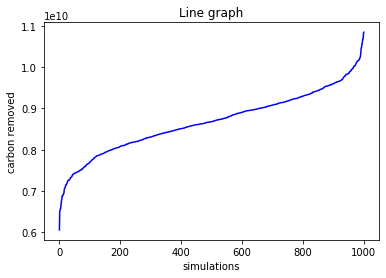

In [15]:
x = np.arange(1, num_simulations+1)
 
plt.title("Line graph")
plt.xlabel("simulations")
plt.ylabel("carbon removed")
plt.plot(x, result_arr, color ="blue")
plt.show()

In [ ]:
# Write out to csv file
filename = 'forestry_simulation_' + str(int(time.time())) + '.csv'

def get_file_headers():
    headers = ['CarbonRemovalRate']
    for r in regions:
        for t in tree_types:
            headers.append(r + ':' + t)
    return ','.join(headers) + '\n'

with open(filename, 'w') as file:
    file.write(get_file_headers())
    for i in range(len(removal_rate_results)):
        file.write(str(removal_rate_results[i]))
        file.write(',')
        file.write(','.join(str(n) for n in land_percentage_results[i].tolist()))
        removal_rate_results[i]
        file.write('\n')

In [ ]:
# Constants from Figure 7, "Global Forest Area by Climatic Domain, 2020" on page 18 of:
# "FAO and UNEP. 2020. The State of the World’s Forests 2020. Forests, biodiversity and people. Rome."
Domain_boreal      = 0.27
Domain_tropical    = 0.45
Domain_temporate   = 0.16
Domain_subtropical = 0.11